In [15]:
import pydataset
from scipy import stats
import seaborn as sns

In [48]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [68]:
import matplotlib.pyplot as plt

In [3]:
faithful = pydataset.data("faithful")

In [4]:
faithful.shape

(272, 2)

In [5]:
type(faithful)

pandas.core.frame.DataFrame

In [9]:
faithful.head()


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [65]:
faithful.corr()

,eruptions,waiting,y_pred
eruptions,1.000000,0.900811,0.900811
waiting,0.900811,1.000000,1.000000
y_pred,0.900811,1.000000,1.000000


In [17]:
y = faithful.eruptions

In [18]:
x = faithful.waiting

In [19]:
corr, pvalue = stats.pearsonr(x,y)

In [20]:
print(f"{corr} is the correlation coeficient.")

0.900811168321813 is the correlation coeficient.


In [23]:
lr = LinearRegression()

In [28]:
X = pd.DataFrame(x)

In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
lr1 = lr.fit(X,y)

In [31]:
lr1.intercept_

-1.8740159864107393

In [32]:
lr1.coef_

array([0.07562795])

In [33]:
y_pred = lr1.predict(X)

In [41]:
y_pred.size

272

In [45]:
y.shape

(272,)

In [44]:
X.shape

(272, 1)

In [35]:
faithful['y_pred'] = y_pred

In [37]:
faithful.head()

,eruptions,waiting,y_pred
1,3.600,79,4.100592
2,1.800,54,2.209893
3,3.333,74,3.722452
4,2.283,62,2.814917
5,4.533,85,4.554360


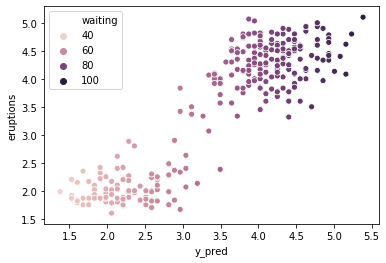

In [49]:
sns.scatterplot(x=faithful.y_pred, y=faithful.eruptions, hue=faithful.waiting)

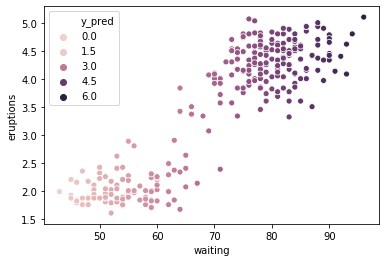

In [50]:
sns.scatterplot(x=faithful.waiting, y=faithful.eruptions, hue=faithful.y_pred)

In [51]:
regression_model_mse = mean_squared_error(y_pred, y)

In [52]:
regression_model_mse

0.24471241070845534

In [55]:
lr1.score(X, y)

0.8114607609733095

In [56]:
lr1.score(X, y_pred)

1.0

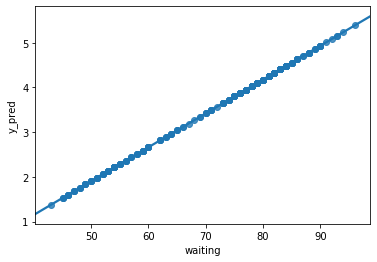

In [57]:
sns.regplot(x="waiting", y="y_pred", data=faithful)

In [59]:
sns.set(color_codes=True)

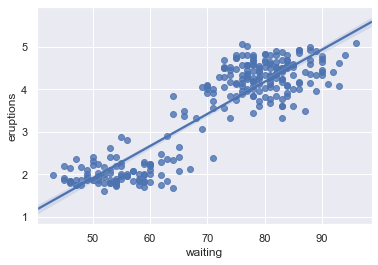

In [60]:
sns.regplot(x="waiting", y="eruptions", data=faithful)

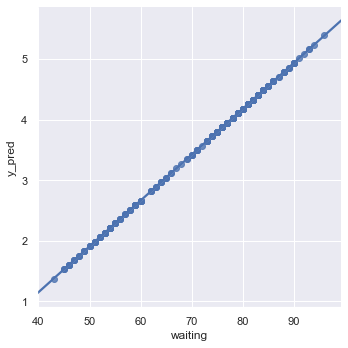

In [63]:
sns.lmplot(x="waiting", y="y_pred", data=faithful);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


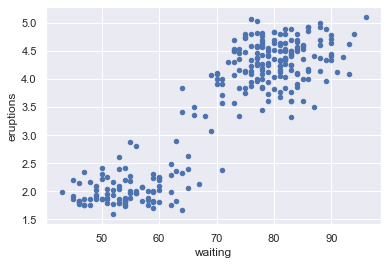

In [66]:
faithful.plot.scatter(y='eruptions', x='waiting')

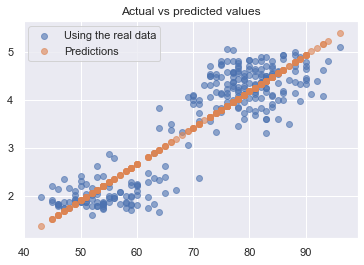

In [74]:
plt.scatter(X, y, label='Using the real data', alpha=0.6)
plt.scatter(X, faithful.y_pred, label='Predictions', alpha=0.6)
plt.title("Actual vs predicted values")
plt.legend()
plt.